<a href="https://colab.research.google.com/github/Reign2121/Mining-project/blob/main/%EA%B3%B5%EB%A6%89_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
G = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab/머신러닝 입문/Data/공릉동_상권분석_최최종_.csv",encoding = 'cp949')
G.info()
G.describe()
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   서비스_업종_코드_명   506 non-null    object
 1   분기당_매출_금액     506 non-null    int64 
 2   분기당_매출_건수     506 non-null    int64 
 3   남성_매출_비율      506 non-null    int64 
 4   여성_매출_비율      506 non-null    int64 
 5   연령대_10_매출_비율  506 non-null    int64 
 6   연령대_20_매출_비율  506 non-null    int64 
 7   연령대_30_매출_비율  506 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.8+ KB
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB o

In [ ]:
G.head()

,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율
0,음식점,8466933897,273671,64,36,0,11,18
1,음식점,362971950,17919,68,32,0,11,21
2,음식점,165879127,3816,61,39,0,16,24
3,음식점,138237410,7856,61,39,1,16,25
4,제과/음료,286257390,33397,43,57,1,16,21


전체 데이터 관계분포 시각화 (유의미하지 않음)

In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

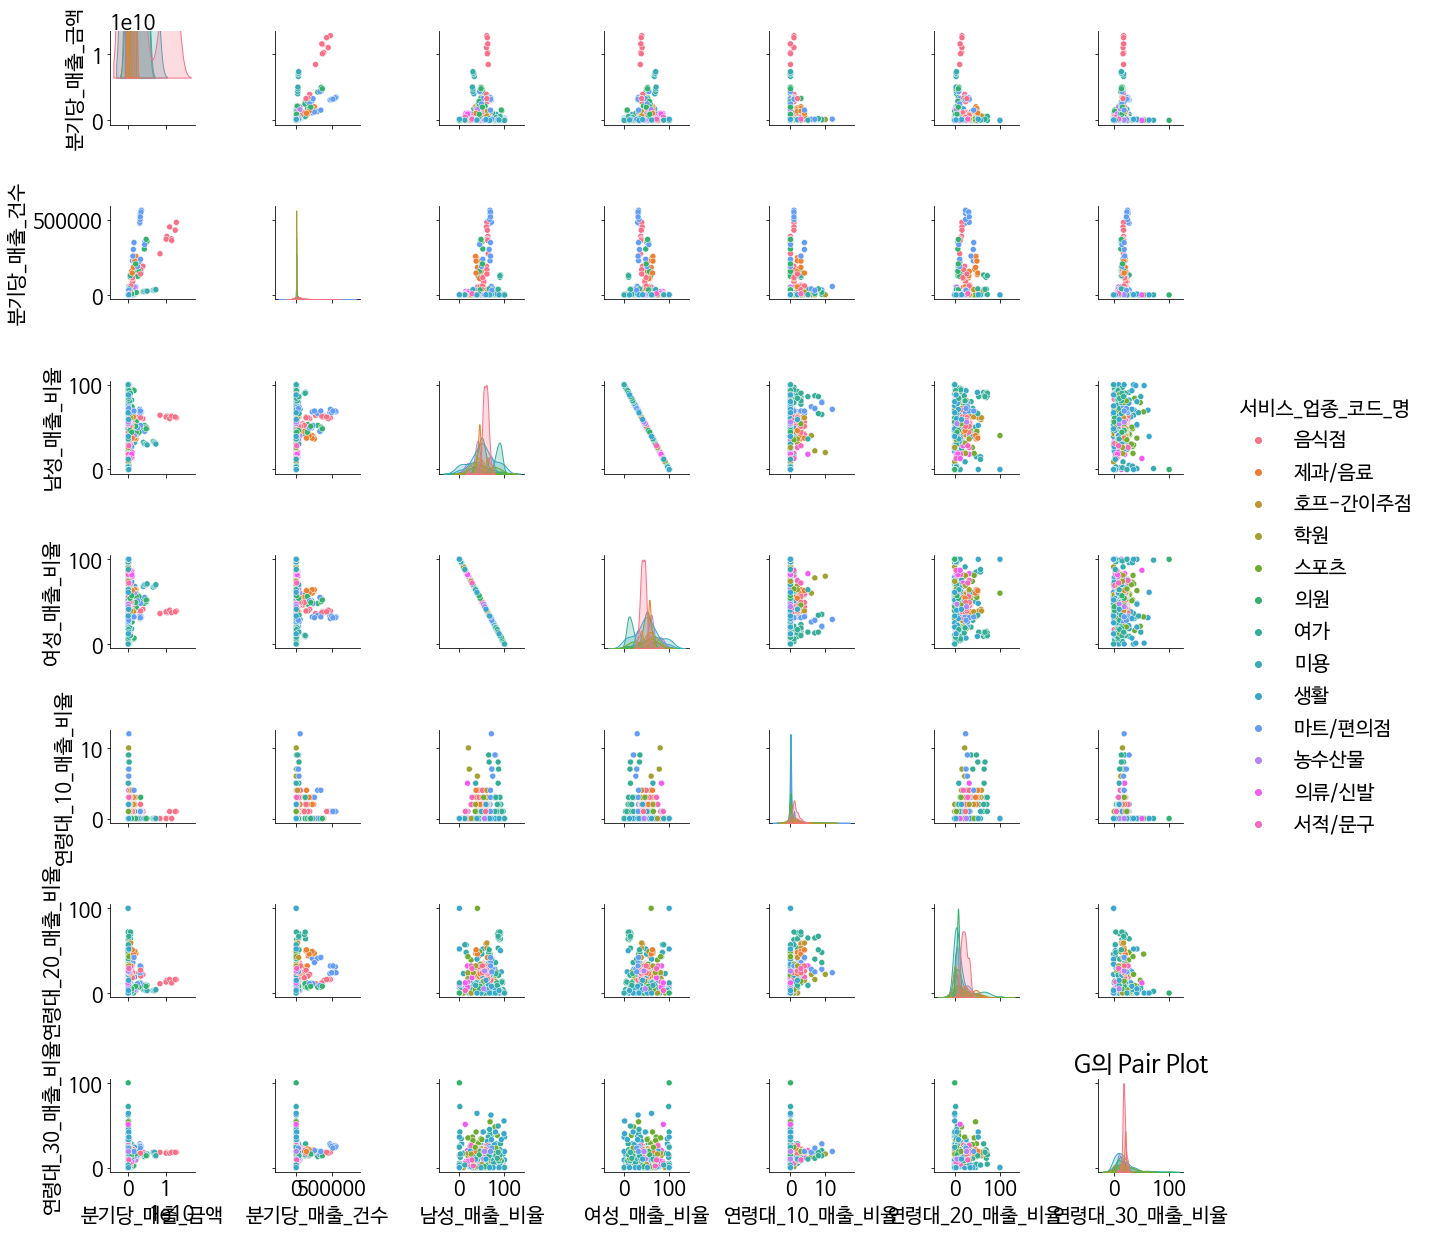

In [ ]:
import seaborn as sns
G2 = G.iloc[:,0:8]
from matplotlib import font_manager, rc
sns.pairplot(G, hue = '서비스_업종_코드_명')
plt.title("G의 Pair Plot")
plt.show()

업종별 매출액 분석
그렇다면 매출액과 건수는 상관관계가 있는가?

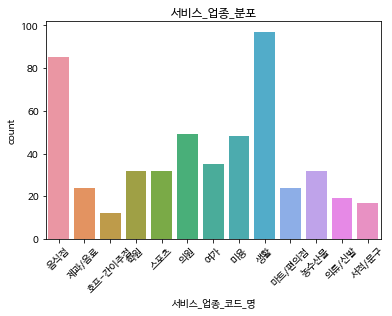

In [ ]:
S = sns.countplot(x="서비스_업종_코드_명", data=G)
plt.title("서비스_업종_분포")
plt.rcParams['font.size'] = 10
S.set_xticklabels(S.get_xticklabels(),rotation = 45)
plt.show()
# font 크기 조절

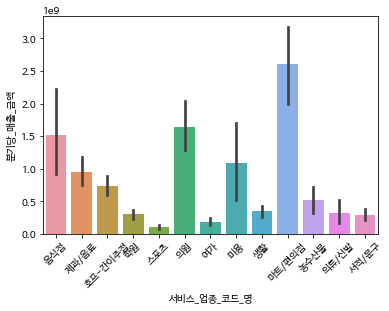

In [ ]:
A = sns.barplot(x="서비스_업종_코드_명",y="분기당_매출_금액", data=G)
A.set_xticklabels(A.get_xticklabels(),rotation = 45)
plt.rcParams['font.size'] = 10
plt.show()

In [ ]:
sns.jointplot(x="분기당_매출_건수", y="분기당_매출_금액", data=G, kind='scatter',)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.rcParams['font.size'] = 10
plt.show() 

매출 건수와 금액의 상관관계 (상관분석) in numpy 
= 매우 높은 상관관계!!! 즉, 건수가 높을수록 금액이 높다. <건수만 가지고 하는게 더 좋을듯> <왜냐면, 일단 돈을 많이 쓰게, 그 건수가 높다는 것이 더 좋으니까, 업종별 가격도 다 다르고>

In [ ]:
import numpy as np
x=G["분기당_매출_건수"].values
y=G["분기당_매출_금액"].values
np.corrcoef(x,y)[0,1]

0.7121416715925483

그렇다면 공릉동 상권을 이루는 주 연령층과 남여 비율은 어떻게 될까?

In [ ]:
a = G["여성_매출_비율"].mean()
a

48.709486166007906

In [ ]:
b = G["남성_매출_비율"].mean()
b
ab1 = ("여성매출비율","남성매출비율")
ab2 = (a,b)

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
flist = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
flist[0:5]

['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf']

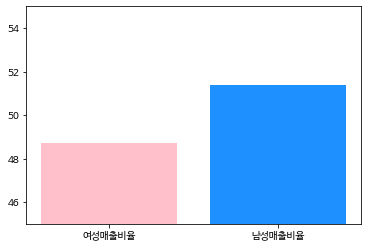

In [ ]:
import numpy as np
colors =['pink', 'dodgerblue']
plt.bar(ab1,ab2, color = colors)
plt.ylim([45, 55])
plt.show()

In [ ]:
z = G["연령대_10_매출_비율"].mean()
x = G["연령대_20_매출_비율"].mean()
c = G["연령대_30_매출_비율"].mean()
qwe = (z,x,c)
t = ("연령대_10_매출_비율","연령대_20_매출_비율","연령대_30_매출_비율")
print(z,x,c)

0.8557312252964426 15.403162055335969 16.059288537549406


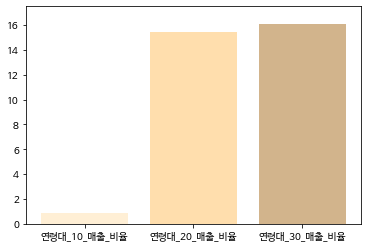

In [ ]:
colors2 =['papayawhip', 'navajowhite', "tan"]
plt.bar(t,qwe, color = colors2)
plt.ylim([0, 17.5])
plt.show()